In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
folder = ('/content/drive/MyDrive/Book_data/books_new.csv')
book_new = pd.read_csv(folder, on_bad_lines='skip')
book_new.head()

,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,9780439785969,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,9780439358071,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,9780439554893,eng,352,6333,244,11/1/2003,Scholastic
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9780439655484,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
book_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB


In [5]:
book_new[["publication_day", "publication_month", "publication_year"]] = book_new["publication_date"].str.split("/", expand = True)

In [6]:
book_new = book_new.drop("publication_day", axis = 1)
book_new = book_new.drop("publication_month", axis = 1)
book_new = book_new.drop("isbn13", axis = 1)

In [7]:
book_new.head()

,bookID,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,0439785960,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,0439358078,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,0439554896,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,0439682584,eng,2690,41428,164,9/13/2004,Scholastic,2004


In [8]:
book_new.isna().sum()

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
publication_year      0
dtype: int64

In [9]:
book_new.drop_duplicates(keep='last', inplace=True) 
book_new.reset_index(drop = True, inplace = True)

In [10]:
book_new.shape

(11123, 12)

**DATA VISULIAZATION**

Text(0.5, 1.0, 'No. of Books by an author (top 15)')

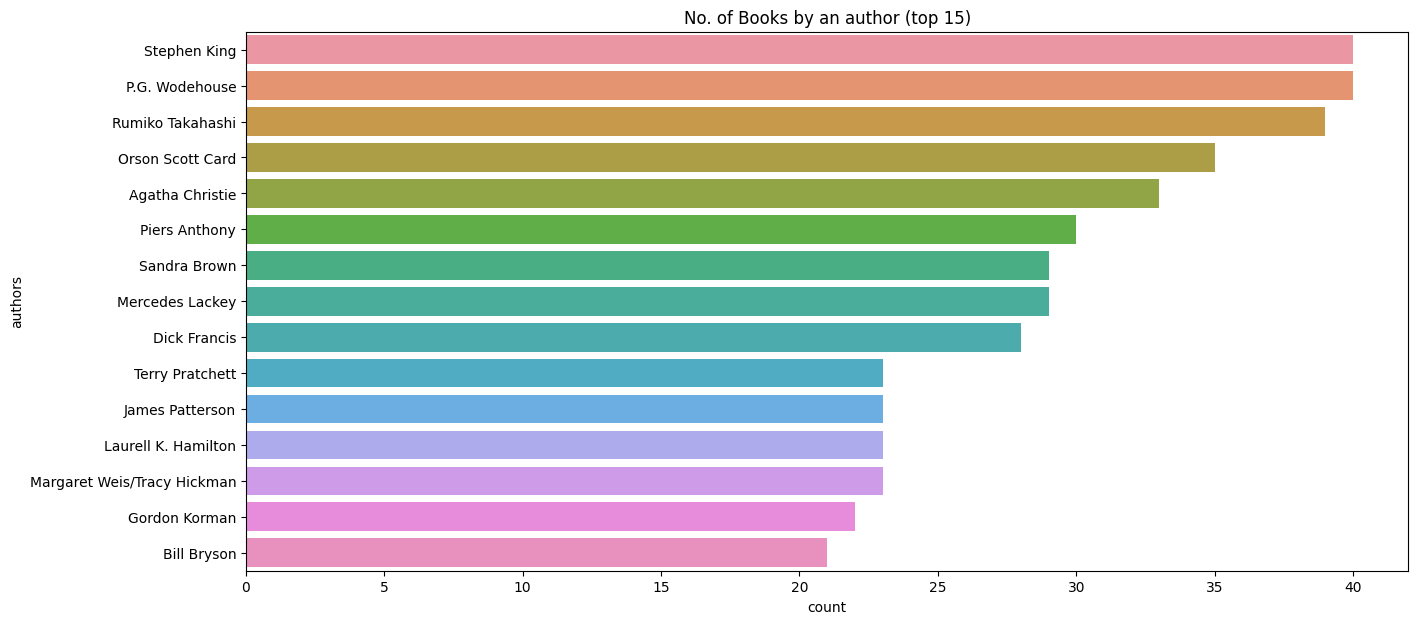

In [11]:
plt.figure(figsize=(15,7))
sns.countplot(y = "authors", data= book_new, order=book_new['authors'].value_counts().index[0:15])
plt.title("No. of Books by an author (top 15)")

Text(0.5, 1.0, 'No. of Books by an publisher (top 15)')

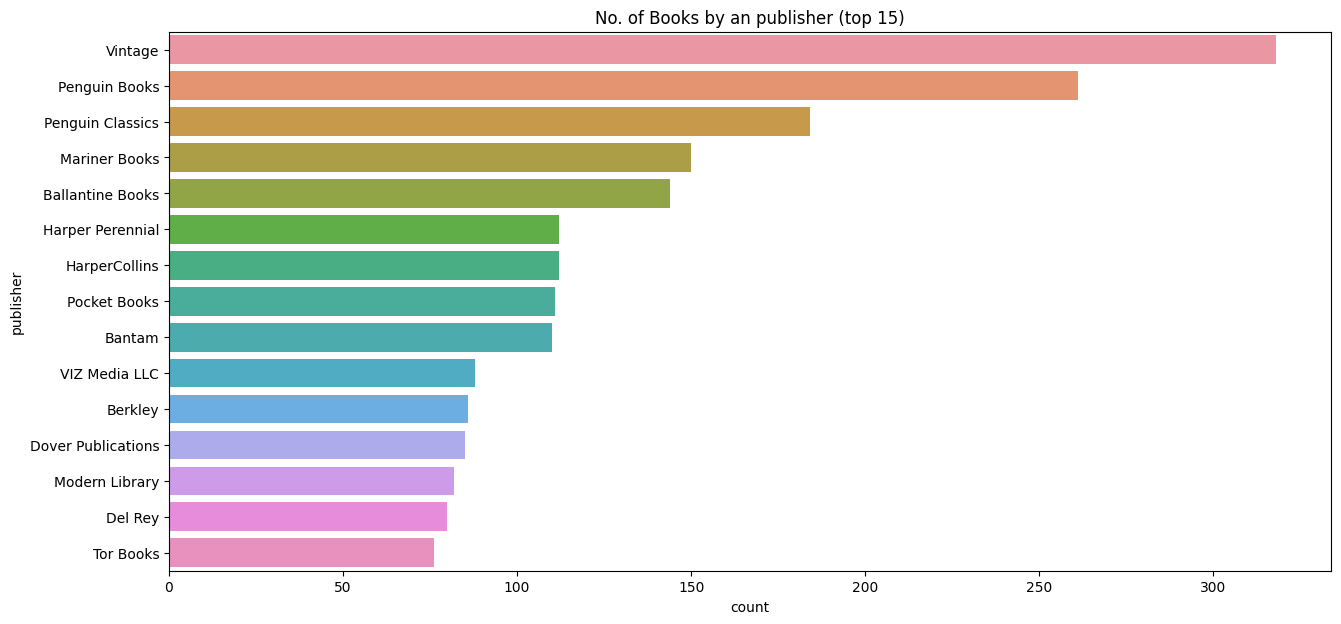

In [12]:
plt.figure(figsize=(15,7))
sns.countplot(y = "publisher", data= book_new, order=book_new['publisher'].value_counts().index[0:15])
plt.title("No. of Books by an publisher (top 15)")

Text(0.5, 1.0, 'No. of Books by an book title (top 15)')

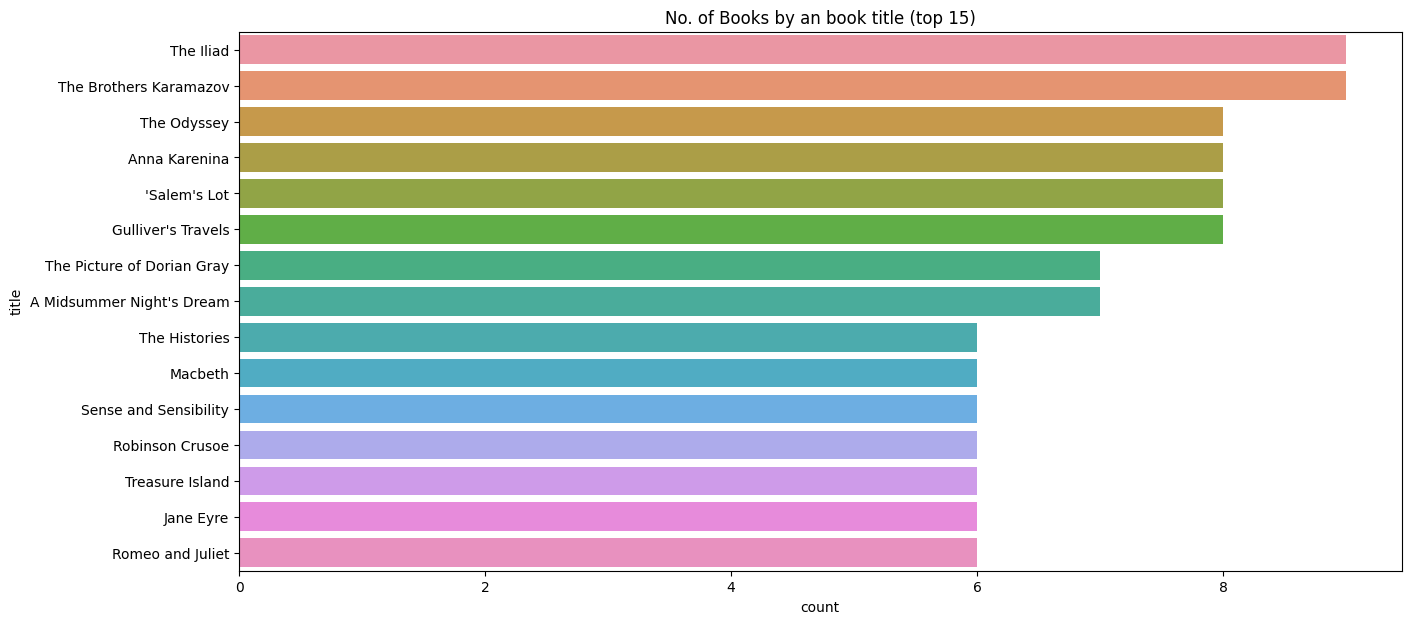

In [13]:
plt.figure(figsize=(15,7))
sns.countplot(y = "title", data= book_new, order=book_new['title'].value_counts().index[0:15])
plt.title("No. of Books by an book title (top 15)")

Text(0.5, 1.0, 'No. of Books by an book language  (top 7)')

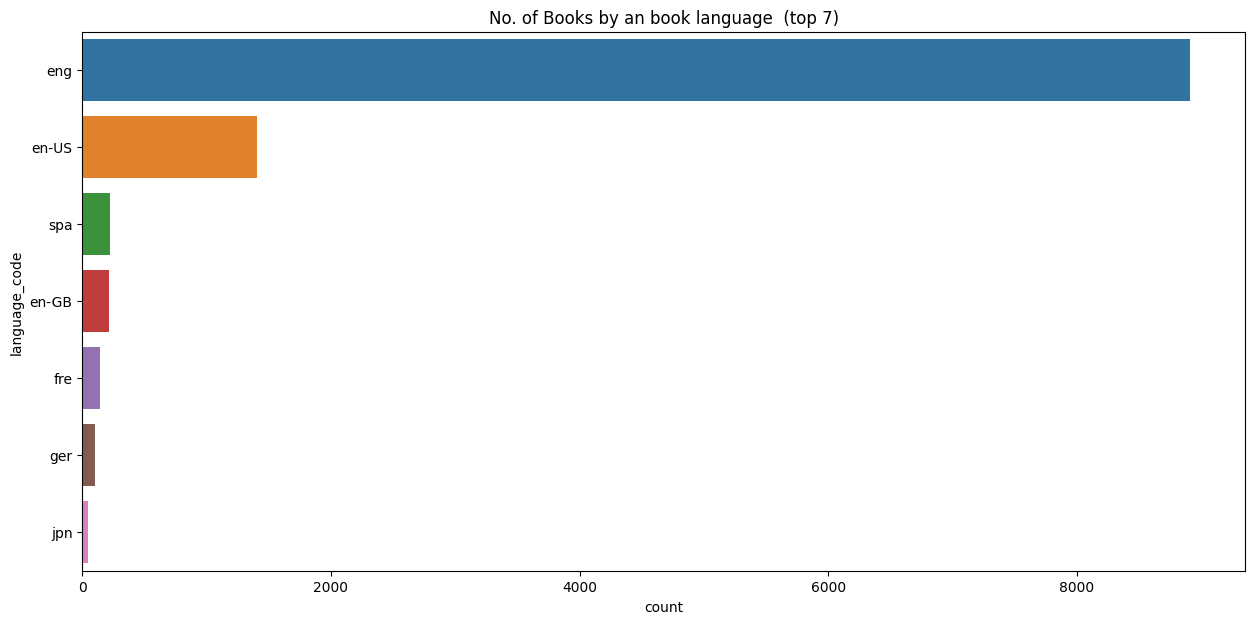

In [14]:
plt.figure(figsize=(15,7))
sns.countplot(y = "language_code", data= book_new, order=book_new['language_code'].value_counts().index[0:7])
plt.title("No. of Books by an book language  (top 7)")

Text(0.5, 1.0, 'Explicit Ratings')

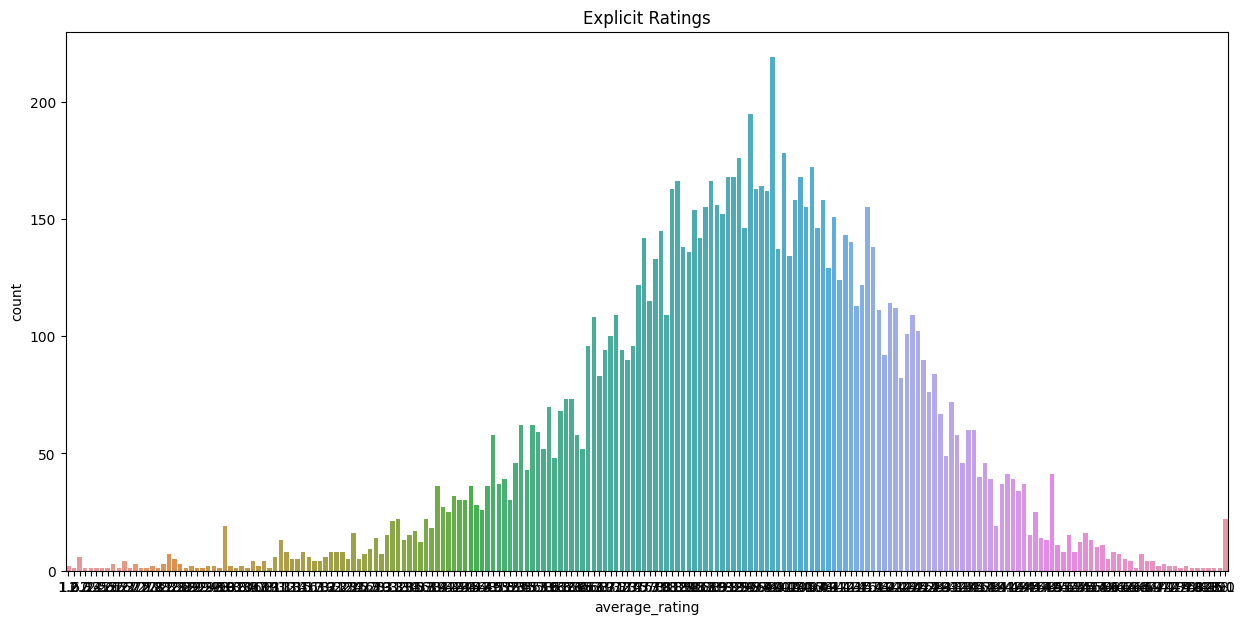

In [15]:
plt.figure(figsize=(15,7))
dt = book_new[book_new['average_rating'] != 0]
sns.countplot(x = 'average_rating', data = dt)
plt.title("Explicit Ratings")

# **Recommendation Model**

In [20]:
bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

#Quiet Days in Clichy
#Dune Messiah (Dune Chronicles #2)

Enter a book name: A Short History of Nearly Everything
Enter number of books to recommend: 7


**Books by same Author**

In [21]:
def printBook(k, n):
    z = k['title'].unique()
    for x in range(len(z)):
        print(z[x])
        if x >= n-1:
            break

In [22]:
def get_books1(dataframe, name, n):
    print("\nBooks by same Author:\n")
    au = dataframe['authors'].unique()

    data = book_new[book_new['title'] != name]

    if au[0] in list(data['authors'].unique()):
        k2 = data[data['authors'] == au[0]]
    k2 = k2.sort_values(by=['average_rating'])
    printBook(k2, n)

In [23]:
if bookName in list(book_new['title'].unique()):
    d = book_new[book_new['title'] == bookName]
    get_books1(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Author:

Bill Bryson's African Diary
Journeys in English
The Lost Continent: Travels in Small Town America
The Lost Continent:  Travels in Small-town America
Neither Here nor There: Travels in Europe
Bryson's Dictionary of Troublesome Words: A Writer's Guide to Getting It Right
I'm a Stranger Here Myself: Notes on Returning to America After Twenty Years Away


**Books by same publisher**

In [24]:
def get_books2(dataframe, name, n):
    print("\nBooks by same Publisher:\n")
    au = dataframe['publisher'].unique()

    data = book_new[book_new['title'] != name]

    if au[0] in list(data['publisher'].unique()):
        k2 = data[data['publisher'] == au[0]]
    k2 = k2.sort_values(by=['average_rating'])
    printBook(k2, n)

In [25]:
if bookName in list(book_new['title'].unique()):
    d = book_new[book_new['title'] == bookName]
    get_books2(d, bookName, number)
else:
    print("Invalid Book Name!!")


Books by same Publisher:

The Alchemist's Daughter
Northern Lights
Love @ First Site
Bill Bryson's African Diary
Thumbsucker
Mr. Maybe
Holy Cow: An Indian Adventure


**Popularity based**

In [26]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('isbn')['average_rating'].count()).sort_values('average_rating', ascending=False).head(n)
        result = pd.merge(data, book_new, on='isbn')
        return result
    return "Invalid number of books entered!!"

In [27]:
print("Top", number, "Popular books are: ")
popularity_based(book_new, number)

Top 7 Popular books are: 


,isbn,average_rating_x,bookID,title,authors,average_rating_y,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,000100039X,1,2547,The Prophet,Kahlil Gibran/جبران خليل جبران/Jihad El,4.23,eng,127,184293,5418,1/1/2010,Rupa & Co,2010
1,0786282827,1,19456,Ready or Not (All-American Girl #2),Meg Cabot,3.40,en-US,238,86,8,4/12/2006,Thorndike Press,2006
2,0786179953,1,29359,Charlie Wilson's War: The Extraordinary Story ...,George Crile/Christopher Lane,4.01,en-US,10,24,7,10/1/2005,Blackstone Audiobooks,2005
3,0786180307,1,3574,Anne of Avonlea,L.M. Montgomery/Susan O'Malley,4.23,eng,8,63,8,12/1/1998,Blackstone Audiobooks,1998
4,0786180404,1,17241,Dracula,Bram Stoker/Robert Whitfield,3.99,eng,15,53,12,12/1/1998,Blackstone Audiobooks,1998
5,0786198389,1,17344,Till We Have Faces: A Myth Retold,C.S. Lewis/Nadia May,4.19,eng,9,60,17,9/1/2000,Blackstone Publishing,2000
6,0786222727,1,34318,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling/Mary GrandPré,4.47,eng,424,147,13,11/12/1999,Thorndike Press Large Print,1999


**Books based on their popularity in certain language**

In [28]:
def search_unique_places(dataframe, lang):
    lang = lang.lower()

    if lang in list(dataframe['language_code'].unique()):
        return dataframe[dataframe['language_code'] == lang]
    else:
        return "Invalid Entry"

In [29]:
book_new['language_code'].unique()

array(['eng', 'en-US', 'fre', 'spa', 'en-GB', 'mul', 'grc', 'enm',
       'en-CA', 'ger', 'jpn', 'ara', 'nl', 'zho', 'lat', 'por', 'srp',
       'ita', 'rus', 'msa', 'glg', 'wel', 'swe', 'nor', 'tur', 'gla',
       'ale'], dtype=object)

In [30]:
lang = input("Enter the name of language code: ")
data = search_unique_places(book_new, lang)
if isinstance(data, pd.DataFrame):
    data = popularity_based(data, number)

data

Enter the name of language code: fre


,isbn,average_rating_x,bookID,title,authors,average_rating_y,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,publication_year
0,0156013983,1,28865,Le Petit Prince,Antoine de Saint-Exupéry,4.31,fre,87,3045,215,9/4/2001,Mariner Books,2001
1,0318634872,1,41307,La chute,Albert Camus,4.04,fre,152,87,6,1/11/1999,Gallimard,1999
2,2268031675,1,41979,Nos rêves de Castelbay,Maeve Binchy,3.80,fre,434,1,0,3/29/1999,Editions du Rocher,1999
3,2268041042,1,11285,Vengeance (Joe Kurtz #1),Dan Simmons,3.68,fre,243,1,0,10/31/2001,Editions du Rocher,2001
4,2268042618,1,25367,Disparitions,Natsuo Kirino,3.81,fre,453,104,9,5/27/2002,Bertrand,2002
5,2268043185,1,11518,L'Épée de Darwin,Dan Simmons/Guy Abadia,3.33,fre,436,3,0,11/20/2002,Éditions du Rocher,2002
6,2290053651,1,8704,Starship Titanic,Terry Jones/Marie-Catherine Caillava,3.60,fre,189,8790,152,11/30/2001,J'ai Lu,2001


In [31]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

**Collaborative Filtering (User-Item Filtering)**

In [32]:
df = pd.DataFrame(book_new['title'].value_counts())

df['title'] = df.index
df.reset_index(level=0, inplace=True)
df = df.drop('index',axis=1)

df = book_new.merge(df, left_on = 'title', right_on = 'title', how = 'left')

popularity_threshold = 4
popular_book = df[df['average_rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)

In [33]:
testdf = pd.DataFrame()
testdf['isbn'] = popular_book['isbn']
testdf['average_rating'] = popular_book['average_rating']
testdf['bookID'] = popular_book['bookID']
testdf = testdf[['bookID','average_rating']].groupby(testdf['isbn'])

In [34]:
listOfDictonaries=[]
indexMap = {}
reverseIndexMap = {}
ptr=0

for groupKey in testdf.groups.keys():
    tempDict={}
    groupDF = testdf.get_group(groupKey)
    for i in range(0,len(groupDF)):
        tempDict[groupDF.iloc[i,0]] = groupDF.iloc[i,1]
    indexMap[ptr]=groupKey
    reverseIndexMap[groupKey] = ptr
    ptr=ptr+1
    listOfDictonaries.append(tempDict)

dictVectorizer = DictVectorizer(sparse=True)
vector = dictVectorizer.fit_transform(listOfDictonaries)
pairwiseSimilarity = cosine_similarity(vector)

In [35]:
def printBookDetails(ID):
    print(book_new[book_new['isbn']==ID]['title'].values[0])

def getTopRecommandations(ID):
    collaborative = []
    row = reverseIndexMap[ID]
    print("Input Book:")
    printBookDetails(ID)
    
    print("\nRECOMMENDATIONS:\n")
    
    mn = 0
    similar = []
    for i in np.argsort(pairwiseSimilarity[row])[:-2][::-1]:
          if book_new[book_new['isbn']==indexMap[i]]['title'].values[0] not in similar:
                if mn >= number:
                      break
                mn+=1
                similar.append(book_new[book_new['isbn']==indexMap[i]]['title'].values[0])
                printBookDetails(indexMap[i])
                collaborative.append(book_new[book_new['isbn']==indexMap[i]]['title'].values[0])
    return collaborative


In [40]:
bookName1 = input("Enter a book name: ")
#Harry Potter and the Prisoner of Azkaban (Harry Potter  #3)
#Coming Into the Country
#Break In (Kit Fielding  #1)

Enter a book name: Break In (Kit Fielding  #1)


In [41]:
k = list(book_new['title'])
m = list(book_new['isbn'])

collaborative = getTopRecommandations(m[k.index(bookName1)])

Input Book:
Break In (Kit Fielding  #1)

RECOMMENDATIONS:

Tales of a Fourth Grade Nothing (Fudge  #1)
Fudge-a-Mania (Fudge  #4)
For Kicks
Goddess of Spring (Goddess Summoning  #2)
Guilty Pleasures (Anita Blake  Vampire Hunter  #1)
Odds Against (Sid Halley  #1)
Death's Acre: Inside the Legendary Forensic Lab the Body Farm Where the Dead Do Tell Tales


**Content Based**

In [42]:
popularity_threshold = 4
popular_book = df[df['average_rating'] >= popularity_threshold]
popular_book = popular_book.reset_index(drop = True)
popular_book.shape

(4954, 12)

In [43]:
tf = TfidfVectorizer(ngram_range=(1, 2), min_df = 1, stop_words='english')
tfidf_matrix = tf.fit_transform(popular_book['title'])
tfidf_matrix.shape

(4954, 19132)

In [44]:
normalized_df = tfidf_matrix.astype(np.float32)
cosine_similarities = cosine_similarity(normalized_df, normalized_df)
cosine_similarities.shape

(4954, 4954)

In [45]:
print("Recommended Books:\n")
isbn = book_new.loc[book_new['title'] == bookName1].reset_index(drop = True).iloc[0]['isbn']
content = []

idx = popular_book.index[popular_book['isbn'] == isbn].tolist()[0]
similar_indices = cosine_similarities[idx].argsort()[::-1]
similar_items = []
for i in similar_indices:
    if popular_book['title'][i] != bookName1 and popular_book['title'][i] not in similar_items and len(similar_items) < number :
        similar_items.append(popular_book['title'][i])
        content.append(popular_book['title'][i])

for book in similar_items:
    print(book)

Recommended Books:

Bolt (Kit Fielding  #2)
A Higher Justice (The Trials of Kit Shannon #5)
It's Called a Breakup Because It's Broken: The Smart Girl's Break-Up Buddy
The War of Art: Break Through the Blocks & Win Your Inner Creative Battles
Sabriel (Abhorsen  #1)
Many Luscious Lollipops: A Book About Adjectives
Poetics of Music in the Form of Six Lessons


In [49]:
number1 = int(input("Enter number of books to recommend: "))

Enter number of books to recommend: 7


**Hybrid Recommender**

In [47]:
from numpy import *
import operator

In [50]:
z = list()
num = 1/number1
k = float(num)
for x in range(number1 ):
      z.append(1-k*x)

dictISBN = {}
for x in collaborative:
      dictISBN[x] = z[collaborative.index(x)]

for x in content:
    if x not in dictISBN:
        dictISBN[x] = z[content.index(x)]
    else:
        dictISBN[x] += z[content.index(x)]

ISBN = dict(sorted(dictISBN.items(),key=operator.itemgetter(1),reverse=True))
w = 0
print("Input Book:\n")
print(bookName1)
print("\nRecommended Books:\n")
for x in ISBN.keys():
    if w >= number1:
        break
    w+=1
    print(x)

Input Book:

Break In (Kit Fielding  #1)

Recommended Books:

Tales of a Fourth Grade Nothing (Fudge  #1)
Bolt (Kit Fielding  #2)
Fudge-a-Mania (Fudge  #4)
A Higher Justice (The Trials of Kit Shannon #5)
For Kicks
It's Called a Breakup Because It's Broken: The Smart Girl's Break-Up Buddy
Goddess of Spring (Goddess Summoning  #2)
